In [1]:
#Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)


In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy


In [5]:

#Create a list for holding the cities
cities = []

In [6]:
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

602

In [9]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


new norfolk au
ipora br
pisco pe
saint george bm
puerto ayora ec
jutai br
antalaha mg
chumikan ru
mataura pf
rikitea pf
nabire id
punta arenas cl
bambous virieux mu
bluff nz
lebu cl
new norfolk au
barrow us
port alfred za
busselton au
carnarvon au
moindou nc
qaanaaq gl
lagoa pt
kenai us
maldonado uy
butaritari ki
formoso do araguaia br
mataura pf
port alfred za
pevek ru
punta arenas cl
qaanaaq gl
leningradskiy ru
isangel vu
kapaa us
xining cn
kyzyl ru
atuona pf
la romana do
illoqqortoormiut gl
cleveland us
hobart au
dikson ru
jamestown sh
pisco pe
punta arenas cl
hilo us
rikitea pf
rikitea pf
ushuaia ar
belushya guba ru
nizwa om
lorengau pg
berezovka ru
punta arenas cl
tara ru
karakose tr
port elizabeth za
atuona pf
iracoubo gf
ushuaia ar
thompson ca
belushya guba ru
victoria sc
goderich sl
mataura pf
san martin ar
tasiilaq gl
rikitea pf
ushuaia ar
leshukonskoye ru
karratha au
avarua ck
ponta do sol cv
ilulissat gl
tuktoyaktuk ca
ormara pk
lakatoro vu
rikitea pf
karakendzha tj
butarita

muriti tz
punta arenas cl
kavaratti in
rikitea pf
ushuaia ar
yumen cn
thompson ca
muros es
lebu cl
nola cf
jamestown sh
bethel us
illoqqortoormiut gl
vaini to
touros br
cherskiy ru
pevek ru
atuona pf
nyurba ru
rikitea pf
bonthe sl
atuona pf
castro cl
busselton au
bluff nz
mar del plata ar
punta arenas cl
los llanos de aridane es
arraial do cabo br
van tr
cape town za
taolanaro mg
grand river south east mu
arlit ne
lebu cl
belushya guba ru
coquimbo cl
port blair in
ilulissat gl
valparaiso cl
tuktoyaktuk ca
port alfred za
ushuaia ar
bluff nz
rikitea pf
port elizabeth za
mataura pf
qaqortoq gl
ushuaia ar
pevek ru
migori ke
bluff nz
puerto ayora ec
butaritari ki
saint-philippe re
sao joao da barra br
belmonte br
dikson ru
amderma ru
busselton au
pangnirtung ca
hithadhoo mv
barrow us
sabla bg
santa fe us
creel mx
zyryanka ru
vaitupu wf
cidreira br
hobart au
mahebourg mu
hilo us
sobolevo ru
port alfred za
dingle ie
ushuaia ar
upernavik gl
castro cl
tumannyy ru
pecos us
lata sb
albany au
port

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6aa31c8ce6c32729e957c5695b9fda5c


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------


In [15]:
# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | new norfolk
Processing Record 2 of Set 13 | ipora
Processing Record 3 of Set 13 | pisco
Processing Record 4 of Set 13 | saint george
Processing Record 5 of Set 13 | puerto ayora
Processing Record 6 of Set 13 | jutai
Processing Record 7 of Set 13 | antalaha
Processing Record 8 of Set 13 | chumikan
Processing Record 9 of Set 13 | mataura
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | nabire
Processing Record 12 of Set 13 | punta arenas
Processing Record 13 of Set 13 | bambous virieux
Processing Record 14 of Set 13 | bluff
Processing Record 15 of Set 13 | lebu
Processing Record 16 of Set 13 | barrow
Processing Record 17 of Set 13 | port alfred
Processing Record 18 of Set 13 | busselton
Processing Record 19 of Set 13 | carnarvon
Processing Record 20 of Set 13 | moindou
Processing Record 21 of Set 13 | qaanaaq
Processing Record 22 of Set 13 | lagoa
Processing Record 23 of Set 13 | kenai
Processing Record 24 of Set 13 | maldonado
Pro

Processing Record 35 of Set 16 | ostrovnoy
Processing Record 36 of Set 16 | la palma
Processing Record 37 of Set 16 | uyskoye
Processing Record 38 of Set 16 | parrita
Processing Record 39 of Set 16 | talnakh
Processing Record 40 of Set 16 | faxinal
Processing Record 41 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 16 | nhulunbuy
Processing Record 43 of Set 16 | skeldon
Processing Record 44 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 16 | georgetown
Processing Record 46 of Set 16 | henties bay
Processing Record 47 of Set 16 | guerrero negro
Processing Record 48 of Set 16 | lasa
Processing Record 49 of Set 16 | wajid
Processing Record 50 of Set 16 | khvastovichi
Processing Record 1 of Set 17 | narsaq
Processing Record 2 of Set 17 | trelew
Processing Record 3 of Set 17 | sao joao da barra
Processing Record 4 of Set 17 | sawang daen din
Processing Record 5 of Set 17 | maloshuyka
City not found. Skipping...
Processing Recor

Processing Record 22 of Set 20 | qaqortoq
Processing Record 23 of Set 20 | migori
Processing Record 24 of Set 20 | amderma
City not found. Skipping...
Processing Record 25 of Set 20 | pangnirtung
Processing Record 26 of Set 20 | sabla
Processing Record 27 of Set 20 | santa fe
Processing Record 28 of Set 20 | creel
Processing Record 29 of Set 20 | zyryanka
Processing Record 30 of Set 20 | cidreira
Processing Record 31 of Set 20 | sobolevo
Processing Record 32 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 20 | pecos
Processing Record 34 of Set 20 | porto novo
Processing Record 35 of Set 20 | acuna
City not found. Skipping...
Processing Record 36 of Set 20 | nome
Processing Record 37 of Set 20 | kaitong
Processing Record 38 of Set 20 | prince rupert
Processing Record 39 of Set 20 | hami
Processing Record 40 of Set 20 | cayenne
Processing Record 41 of Set 20 | jacareacanga
Processing Record 42 of Set 20 | kumluca
Processing Record 43 of Set 20 | sens
Processi

Processing Record 6 of Set 24 | lerwick
Processing Record 7 of Set 24 | dapitan
Processing Record 8 of Set 24 | maragogi
Processing Record 9 of Set 24 | komsomolskiy
Processing Record 10 of Set 24 | guaymas
Processing Record 11 of Set 24 | secu
Processing Record 12 of Set 24 | maniitsoq
Processing Record 13 of Set 24 | nishihara
Processing Record 14 of Set 24 | caucaia
Processing Record 15 of Set 24 | makakilo city
Processing Record 16 of Set 24 | buraydah
Processing Record 17 of Set 24 | timmins
Processing Record 18 of Set 24 | yima
Processing Record 19 of Set 24 | irbil
Processing Record 20 of Set 24 | bardiyah
Processing Record 21 of Set 24 | korla
Processing Record 22 of Set 24 | aripuana
Processing Record 23 of Set 24 | zhaotong
Processing Record 24 of Set 24 | aykhal
Processing Record 25 of Set 24 | at-bashi
Processing Record 26 of Set 24 | labuhan
Processing Record 27 of Set 24 | yar-sale
Processing Record 28 of Set 24 | buluang
Processing Record 29 of Set 24 | killybegs
Process

In [16]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [18]:
len(city_data)


553

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,53.60,71,75,9.22,AU,2021-02-08 20:27:26
1,Ipora,-16.4419,-51.1178,78.58,75,2,3.00,BR,2021-02-08 20:27:26
2,Pisco,-13.7000,-76.2167,77.00,69,0,8.05,PE,2021-02-08 20:27:26
3,Saint George,37.1041,-113.5841,61.00,20,1,2.93,US,2021-02-08 20:27:26
4,Puerto Ayora,-0.7393,-90.3518,81.00,78,75,8.05,EC,2021-02-08 20:27:26
5,Jutai,-5.1833,-68.9000,84.67,75,100,2.37,BR,2021-02-08 20:27:27
6,Antalaha,-14.9003,50.2788,77.05,85,89,3.51,MG,2021-02-08 20:27:27
7,Chumikan,54.7183,135.3150,-2.63,84,97,23.04,RU,2021-02-08 20:27:27
8,Mataura,-46.1927,168.8643,60.91,77,100,0.92,NZ,2021-02-08 20:27:27
9,Rikitea,-23.1203,-134.9692,77.52,70,39,7.65,PF,2021-02-08 20:27:27


In [20]:
  # Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")  # Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import time module
import time


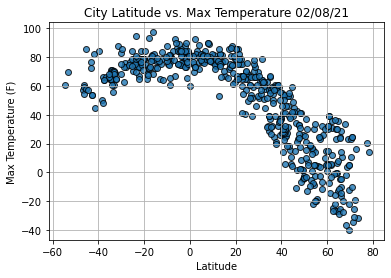

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

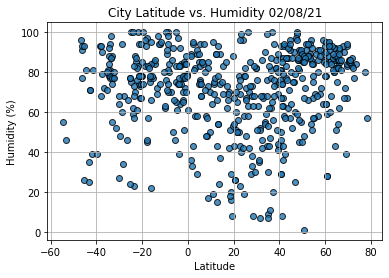

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

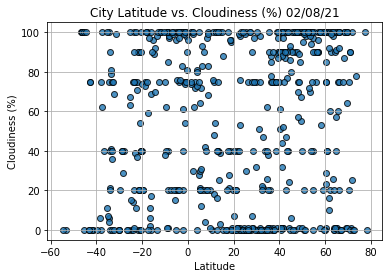

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


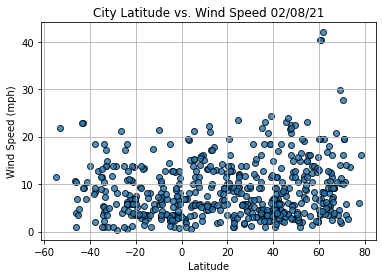

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()